### My personal analysis on covid cases and vaccinations

Data sources are:
    
Vaccinations: https://github.com/owid/covid-19-data/tree/master/public/data
        
COVID cases: https://github.com/CSSEGISandData/COVID-19

In [10]:
%pylab inline
import pandas as pd

matplotlib.rc('xtick', labelsize=12) 
matplotlib.rc('ytick', labelsize=12) 

import matplotlib.dates as mdates

import xarray as xr

days = mdates.DayLocator()   # every day
weeks = mdates.WeekdayLocator(byweekday=TU)   # every week
months = mdates.MonthLocator()  # every month
weeks_fmt = mdates.DateFormatter('%d/%m \n%a')

matplotlib.rcParams['font.family'] = "Arial"
plt.rcParams["xtick.major.size"] = 6
plt.rcParams["xtick.minor.size"] = 4
plt.rcParams["ytick.major.size"] = 0

fnt_size=14

plt.rc('font', size=fnt_size) #controls default text size
plt.rc('axes', titlesize=fnt_size) #fontsize of the title
plt.rc('axes', labelsize=fnt_size) #fontsize of the x and y labels
plt.rc('xtick', labelsize=fnt_size-1) #fontsize of the x tick labels
plt.rc('ytick', labelsize=fnt_size) #fontsize of the y tick labels
plt.rc('legend', fontsize=fnt_size) #fontsize of the legend
plt.rcParams['axes.facecolor'] = 'w'

Populating the interactive namespace from numpy and matplotlib


#### Load global cases data

In [11]:
dat = pd.read_csv('csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')

# extract south africa and sweden

sweden = dat['Country/Region']=='Sweden'
southafrica = dat['Country/Region']=='South Africa'

#### Sweden analysis

In [12]:
cases = dat[sweden].iloc[0][4:].diff()
dates = pd.to_datetime(dat[sweden].iloc[0][4:].index)

xds = xr.DataArray(cases, coords=[dates], dims=["time"])

#### Daily cases - only looking at the last 3 months

In [13]:
tomorrow  = np.datetime64('today') + np.timedelta64(1,'D')
three_mnths = np.datetime64('today') - np.timedelta64(90,'D')

daily = xds.sel(time=slice(three_mnths, tomorrow))

#### Figure: Sweden daily cases over the last 3 months

<ipython-input-14-7cb18be1d079>:26: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "tight_layout" which is no longer supported as of 3.3 and will become an error two minor releases later
  savefig('../../cases_sweden_daily.png', dpi=300, tight_layout=True, bbox_inches='tight', transparent=False)


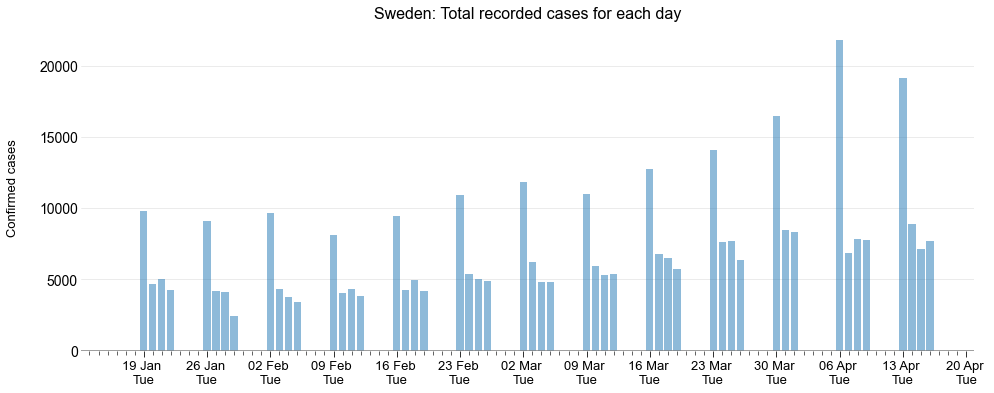

In [14]:
fig, ax = plt.subplots(figsize=(16, 6))
ax.set_frame_on(False)


ax.bar(daily.time, daily, alpha=0.5, zorder=2)

ax.set_xlabel('')
ax.set_ylabel('Confirmed cases', fontsize=13, labelpad=20)

ax.grid(lw=0.5, c='0.85', axis='y', zorder=0)

# format the ticks
ax.xaxis.set_major_locator(weeks)
weeks_fmt = mdates.DateFormatter('%d %b \n%a')
ax.xaxis.set_major_formatter(weeks_fmt)
ax.xaxis.set_minor_locator(days)

plt.xticks(rotation=0)

xmin, xmax = ax.get_xaxis().get_view_interval()
ymin, ymax = ax.get_yaxis().get_view_interval()
ax.add_artist(Line2D((xmin, xmax), (ymin, ymin), color='0.5', linewidth=1.5))

ax.set_title('Sweden: Total recorded cases for each day', fontsize=16)

savefig('../../cases_sweden_daily.png', dpi=300, tight_layout=True, bbox_inches='tight', transparent=False)

#### Weekly sum: due to irregular reporting, I take a look at the weekly total cases

In [15]:
tomorrow  = np.datetime64('today') + np.timedelta64(1,'D')
one_year = np.datetime64('today') - np.timedelta64(365,'D')

week_sw = xds.sel(time=slice(one_year, tomorrow))
week_sw = week_sw.resample(time='W-TUE').sum()

<ipython-input-16-26a3650390b6>:28: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "tight_layout" which is no longer supported as of 3.3 and will become an error two minor releases later
  savefig('../../cases_sweden_week.png', dpi=300, tight_layout=True, bbox_inches='tight')


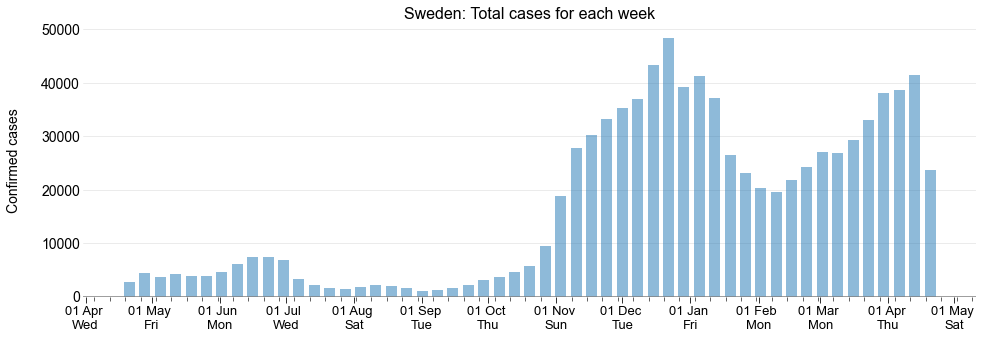

In [16]:
fig, ax = plt.subplots(figsize=(16, 5))
ax.set_frame_on(False)

ax.bar(week_sw.time, week_sw, alpha=0.5, zorder=2, width=0.5e1)

# set label characteristics
ax.set_xlabel('')
ax.set_ylabel('Confirmed cases', labelpad=20)

ax.grid(lw=0.5, c='0.85', axis='y', zorder=0)

# format the ticks
month = mdates.MonthLocator()   # every week
weeks = mdates.WeekdayLocator(byweekday=SU)   # every week
ax.xaxis.set_major_locator(month)
weeks_fmt = mdates.DateFormatter('%d %b \n%a')
ax.xaxis.set_major_formatter(weeks_fmt)
ax.xaxis.set_minor_locator(weeks)

plt.xticks(rotation=0)

xmin, xmax = ax.get_xaxis().get_view_interval()
ymin, ymax = ax.get_yaxis().get_view_interval()
ax.add_artist(Line2D((xmin, xmax), (ymin, ymin), color='0.5', linewidth=1.5))

ax.set_title('Sweden: Total cases for each week', fontsize=16)

savefig('../../cases_sweden_week.png', dpi=300, tight_layout=True, bbox_inches='tight')

#### South Africa analysis

In [20]:
cases = dat[southafrica].iloc[0][4:].diff()
dates = pd.to_datetime(dat[southafrica].iloc[0][4:].index)

xds = xr.DataArray(cases, coords=[dates], dims=["time"])

#### Figure: South Africa daily cases over the last 3 months

In [21]:
tomorrow  = np.datetime64('today') + np.timedelta64(1,'D')
three_mnths = np.datetime64('today') - np.timedelta64(90,'D')

daily = xds.sel(time=slice(three_mnths, tomorrow))

<ipython-input-22-0ffa2db5deaa>:26: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "tight_layout" which is no longer supported as of 3.3 and will become an error two minor releases later
  savefig('../../cases_southafrica_daily.png', dpi=300, tight_layout=True, bbox_inches='tight')


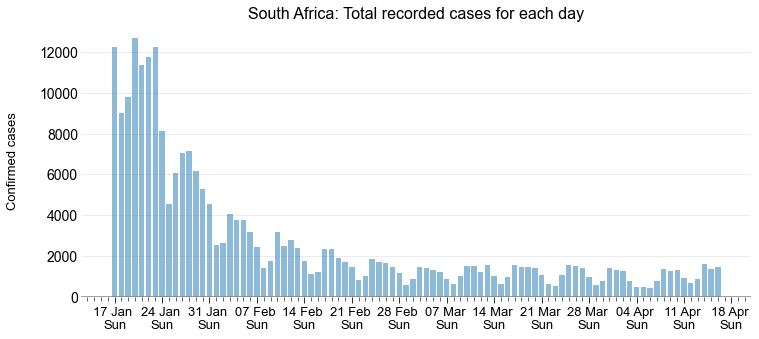

In [22]:
fig, ax = plt.subplots(figsize=(12, 5))
ax.set_frame_on(False)


ax.bar(daily.time, daily, alpha=0.5, zorder=2)

ax.set_xlabel('')
ax.set_ylabel('Confirmed cases', fontsize=13, labelpad=20)

ax.grid(lw=0.5, c='0.85', axis='y', zorder=0)

# format the ticks
ax.xaxis.set_major_locator(weeks)
weeks_fmt = mdates.DateFormatter('%d %b \n%a')
ax.xaxis.set_major_formatter(weeks_fmt)
ax.xaxis.set_minor_locator(days)

plt.xticks(rotation=0)

xmin, xmax = ax.get_xaxis().get_view_interval()
ymin, ymax = ax.get_yaxis().get_view_interval()
ax.add_artist(Line2D((xmin, xmax), (ymin, ymin), color='0.5', linewidth=1.5))

ax.set_title('South Africa: Total recorded cases for each day', fontsize=16)

savefig('../../cases_southafrica_daily.png', dpi=300, tight_layout=True, bbox_inches='tight')

#### Weekly cases

In [23]:
tomorrow  = np.datetime64('today') + np.timedelta64(1,'D')
one_year = np.datetime64('today') - np.timedelta64(365,'D')

week_sa = xds.sel(time=slice(one_year, tomorrow))
week_sa = week_sa.resample(time='W-TUE').sum()

<ipython-input-24-e5c7e2f93baf>:28: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "tight_layout" which is no longer supported as of 3.3 and will become an error two minor releases later
  savefig('../../cases_southafrica_week.png', dpi=300, tight_layout=True, bbox_inches='tight')


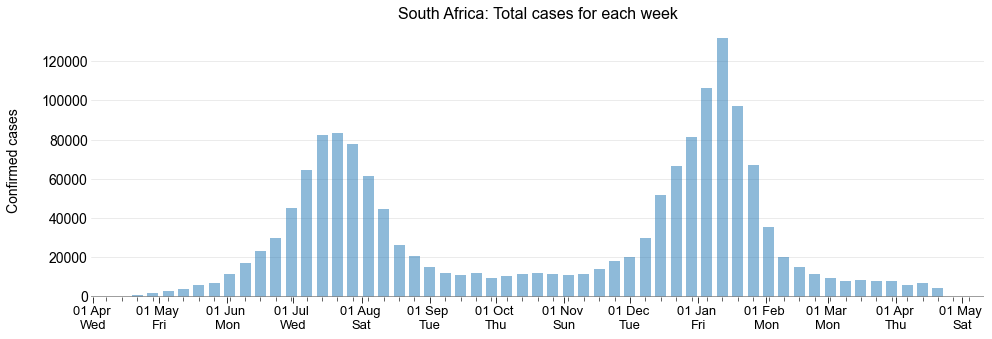

In [24]:
fig, ax = plt.subplots(figsize=(16, 5))
ax.set_frame_on(False)

ax.bar(week_sa.time, week_sa, alpha=0.5, zorder=2, width=0.5e1)

# set label characteristics
ax.set_xlabel('')
ax.set_ylabel('Confirmed cases', labelpad=20)

ax.grid(lw=0.5, c='0.85', axis='y', zorder=0)

# format the ticks
month = mdates.MonthLocator()   # every week
weeks = mdates.WeekdayLocator(byweekday=TU)   # every week
ax.xaxis.set_major_locator(month)
weeks_fmt = mdates.DateFormatter('%d %b \n%a')
ax.xaxis.set_major_formatter(weeks_fmt)
ax.xaxis.set_minor_locator(weeks)

plt.xticks(rotation=0)

xmin, xmax = ax.get_xaxis().get_view_interval()
ymin, ymax = ax.get_yaxis().get_view_interval()
ax.add_artist(Line2D((xmin, xmax), (ymin, ymin), color='0.5', linewidth=1.5))

ax.set_title('South Africa: Total cases for each week', fontsize=16)

savefig('../../cases_southafrica_week.png', dpi=300, tight_layout=True, bbox_inches='tight')

#### Plot Sweden and South Africa for comparison

<ipython-input-25-21fad1558138>:31: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "tight_layout" which is no longer supported as of 3.3 and will become an error two minor releases later
  savefig('../../cases_sweden_southafrica_compare.png', dpi=300, tight_layout=True, bbox_inches='tight')


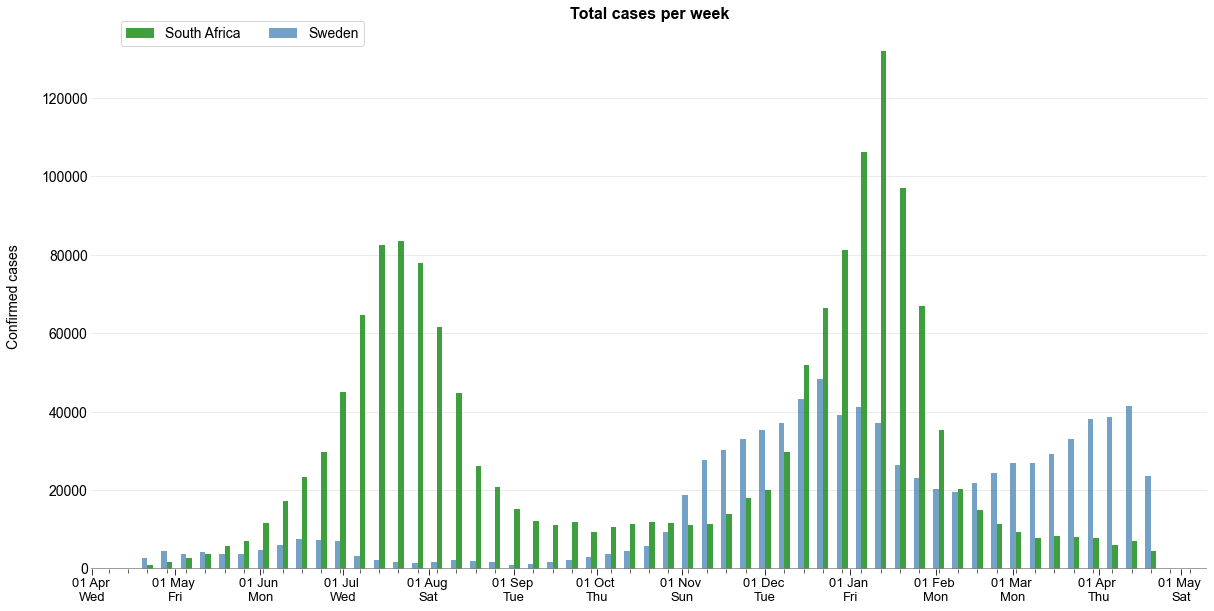

In [25]:
fig, ax = plt.subplots(figsize=(20, 10))
ax.set_frame_on(False)

ax.bar(week_sa.time + np.timedelta64(1,'D'), week_sa, alpha=0.75, width=0.2e1, zorder=2, facecolor='green', label='South Africa')
ax.bar(week_sw.time - np.timedelta64(1,'D'), week_sw, alpha=0.75, width=0.2e1, zorder=2, facecolor='steelblue', label='Sweden')

# set label characteristics
ax.set_xlabel('')
ax.set_ylabel('Confirmed cases', labelpad=20)

ax.grid(lw=0.5, c='0.85', axis='y', zorder=0)

# format the ticks
month = mdates.MonthLocator()   # every week
weeks = mdates.WeekdayLocator(byweekday=TU)   # every week
ax.xaxis.set_major_locator(month)
weeks_fmt = mdates.DateFormatter('%d %b \n%a')
ax.xaxis.set_major_formatter(weeks_fmt)
ax.xaxis.set_minor_locator(weeks)

plt.xticks(rotation=0)

xmin, xmax = ax.get_xaxis().get_view_interval()
ymin, ymax = ax.get_yaxis().get_view_interval()
ax.add_artist(Line2D((xmin, xmax), (ymin, ymin), color='0.5', linewidth=1.5))

ax.set_title('Total cases per week', fontweight='bold', fontsize=16)

ax.legend(loc=2, ncol=2, bbox_to_anchor=(0.02,1.02))

savefig('../../cases_sweden_southafrica_compare.png', dpi=300, tight_layout=True, bbox_inches='tight')

## Vaccinations

This looks and plots the vaccination data for South Africa and Sweden

#### Read in data

In [26]:
dat_sw = pd.read_csv('/Users/marcel/Google Drive/Projects/covid/COVID-19/sweden.csv')
dat_sw['date'] = pd.to_datetime(dat_sw.date)

dat_sa = pd.read_csv('/Users/marcel/Google Drive/Projects/covid/COVID-19/southafrica.csv')
dat_sa['date'] = pd.to_datetime(dat_sa.date)

dat_nw = pd.read_csv('/Users/marcel/Google Drive/Projects/covid/COVID-19/norway.csv')
dat_nw['date'] = pd.to_datetime(dat_nw.date)

dat_dn = pd.read_csv('/Users/marcel/Google Drive/Projects/covid/COVID-19/denmark.csv')
dat_dn['date'] = pd.to_datetime(dat_dn.date)

dat_uk = pd.read_csv('/Users/marcel/Google Drive/Projects/covid/COVID-19/unitedkingdom.csv')
dat_uk['date'] = pd.to_datetime(dat_uk.date)

dat_fn = pd.read_csv('/Users/marcel/Google Drive/Projects/covid/COVID-19/finland.csv')
dat_fn['date'] = pd.to_datetime(dat_fn.date)

dat_gm = pd.read_csv('/Users/marcel/Google Drive/Projects/covid/COVID-19/germany.csv')
dat_gm['date'] = pd.to_datetime(dat_gm.date)

#### Population statistics

I got these numbers from just googling around, please let me know if I've got some wrong. I mainly used statista.com, for example: https://www.statista.com/statistics/454349/population-by-age-group-germany/

In [27]:
# Sweden
sw_pop = 10.38e6
sw_pop_under18 = 2189403

sw_pop_vac = sw_pop-sw_pop_under18

# Finland
fn_pop = 5.55e6 
fn_pop_under18 = 1.17e6

fn_pop_vac = fn_pop-fn_pop_under18

# Norway
nw_pop = 5.39e6
nw_pop_under18 = 1.19e6

nw_pop_vac = nw_pop-nw_pop_under18

# Denmark
dn_pop = 5.84e6
dn_pop_under18 = 1.29e6

dn_pop_vac = dn_pop-dn_pop_under18

# United Kingdom
uk_pop = 66.65e6
uk_pop_under18 = 14e6

uk_pop_vac = uk_pop-uk_pop_under18

# South Africa
sa_pop = 58.56e6
sa_pop_under18 = 19.8e6

sa_pop_vac = sa_pop-sa_pop_under18

# Germany
gm_pop = 83.19e6
gm_pop_under18 = 13.68e6

gm_pop_vac = gm_pop-gm_pop_under18

#### First I take a look at the South African and Swedish cases and vaccination doses, with the hope that a trend will eventually emerge with increasing vaccinations and decreasing cases.

In [28]:
dat_sw.index = dat_sw.date
dat_sw = dat_sw.to_xarray()

dat_sa.index = dat_sa.date
dat_sa = dat_sa.to_xarray()

tomorrow  = np.datetime64('today') + np.timedelta64(1,'D')
three_weeks = np.datetime64('today') - np.timedelta64(21,'D')

dat_sw_1M = dat_sw.sel(date=slice(three_weeks, tomorrow))
dat_sa_1M = dat_sa.sel(date=slice(three_weeks, tomorrow))

### Sweden one and two doses

<ipython-input-29-18c9c3b4b73a>:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.yaxis.set_ticklabels(percentage)


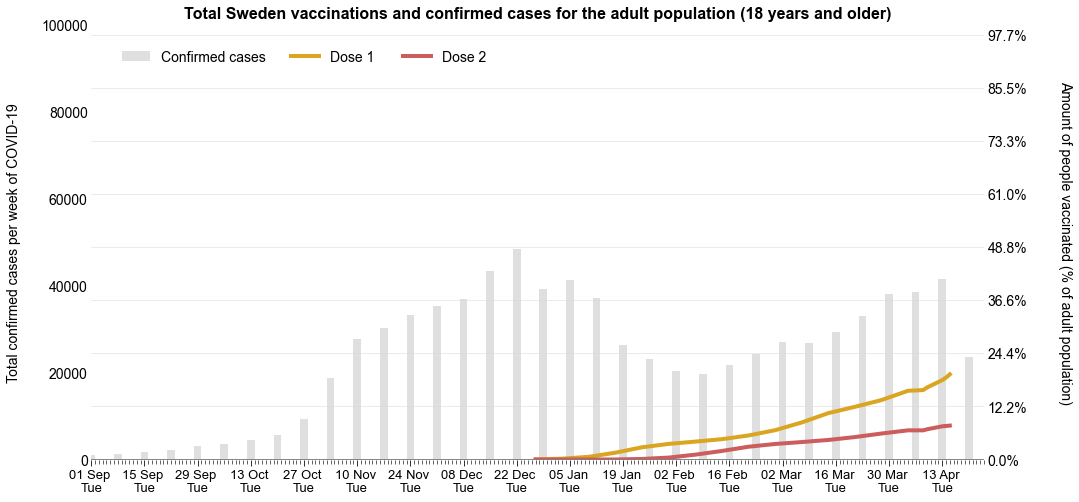

In [29]:
fig, ax = plt.subplots(figsize=(16, 8))


ax.bar(week_sw.time, week_sw, alpha=0.25, zorder=2, width=0.2e1, facecolor='0.5', label='Confirmed cases')
ax.set_ylim(0, 100000)


# plot a second axis to use for the percentage
ax1 = ax.twinx()


# plot the numbers
ax1.plot(dat_sw.date.values, dat_sw['people_vaccinated'],       marker='.', markersize=0, zorder=2, lw=4, label='Dose 1', color='goldenrod')
ax1.plot(dat_sw.date.values, dat_sw['people_fully_vaccinated'], marker='.', markersize=0, zorder=2, lw=4, label='Dose 2', color='indianred')

ax1.set_ylim(0, sw_pop_vac)

locs, labels = yticks()
labels = locs/sw_pop_vac
percentage = ["{:.1%}".format(l) for l in labels]

ax1.yaxis.set_ticklabels(percentage)

# set label characteristics
ax.set_xlabel('')
ax.set_ylabel('Total confirmed cases per week of COVID-19', labelpad=20)
ax1.set_ylabel('Amount of people vaccinated (% of adult population)', labelpad=45, rotation=-90)

ax1.grid(lw=0.5, c='0.85', axis='y', zorder=0)

# format the ticks
month = mdates.MonthLocator()   # every week
weeks = mdates.WeekdayLocator(byweekday=TU, interval=2)   # every week
weeks_fmt = mdates.DateFormatter('%d %b \n%a')

for a in [ax, ax1]:

    a.xaxis.set_major_locator(weeks)
    a.xaxis.set_major_formatter(weeks_fmt)
    a.xaxis.set_minor_locator(days)

    a.set_frame_on(False)

    xmin, xmax = a.get_xaxis().get_view_interval()
    ymin, ymax = a.get_yaxis().get_view_interval()
    a.add_artist(Line2D((xmin, xmax), (ymin, ymin), color='0.5', linewidth=1.5))
    
    a.set_xlim('2020-09-01', np.datetime64('today')+ np.timedelta64(7,'D'))

ax.set_title('Total Sweden vaccinations and confirmed cases for the adult population (18 years and older)', fontsize=16, fontweight='bold')

ax.legend(loc=2, ncol=2, bbox_to_anchor=(0.02,0.97), frameon=False)
ax1.legend(loc=2, ncol=2, bbox_to_anchor=(0.21,0.97), frameon=False)

### South Africa one and two doses

<ipython-input-30-6b8aa27cb257>:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.yaxis.set_ticklabels(percentage)


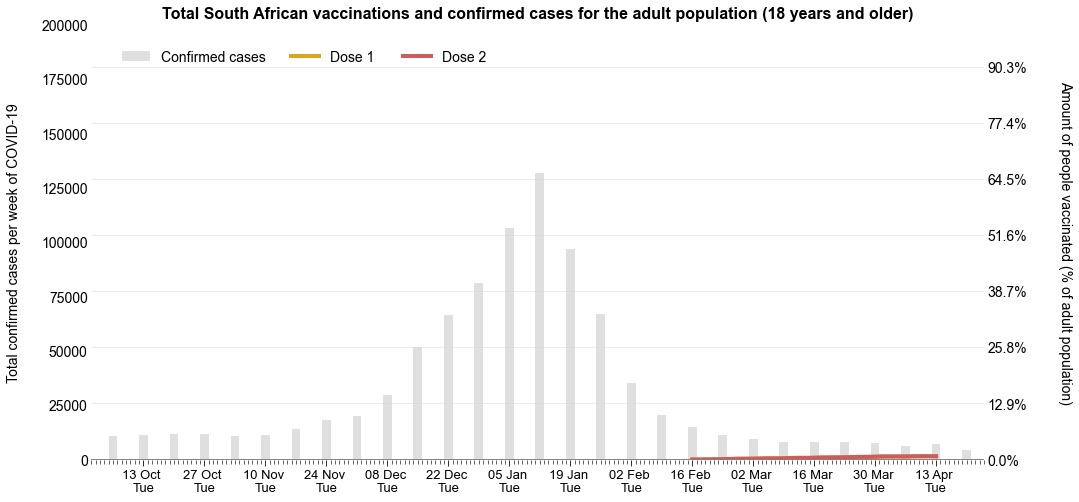

In [30]:
fig, ax = plt.subplots(figsize=(16, 8))


ax.bar(week_sa.time, week_sa, alpha=0.25, zorder=2, width=0.2e1, facecolor='0.5', label='Confirmed cases')
ax.set_ylim(0, 200000)


# plot a second axis to use for the percentage
ax1 = ax.twinx()


# plot the numbers
ax1.plot(dat_sa.date.values, dat_sa['people_vaccinated'],       marker='.', markersize=0, zorder=2, lw=4, label='Dose 1', color='goldenrod')
ax1.plot(dat_sa.date.values, dat_sa['people_fully_vaccinated'], marker='.', markersize=0, zorder=2, lw=4, label='Dose 2', color='indianred')

ax1.set_ylim(0, sa_pop_vac)

locs, labels = yticks()
labels = locs/sa_pop_vac
percentage = ["{:.1%}".format(l) for l in labels]

ax1.yaxis.set_ticklabels(percentage)

# set label characteristics
ax.set_xlabel('')
ax.set_ylabel('Total confirmed cases per week of COVID-19', labelpad=20)
ax1.set_ylabel('Amount of people vaccinated (% of adult population)', labelpad=45, rotation=-90)

ax1.grid(lw=0.5, c='0.85', axis='y', zorder=0)

# format the ticks
month = mdates.MonthLocator()   # every week
weeks = mdates.WeekdayLocator(byweekday=TU, interval=2)   # every week
weeks_fmt = mdates.DateFormatter('%d %b \n%a')

for a in [ax, ax1]:

    a.xaxis.set_major_locator(weeks)
    a.xaxis.set_major_formatter(weeks_fmt)
    a.xaxis.set_minor_locator(days)

    a.set_frame_on(False)

    xmin, xmax = a.get_xaxis().get_view_interval()
    ymin, ymax = a.get_yaxis().get_view_interval()
    a.add_artist(Line2D((xmin, xmax), (ymin, ymin), color='0.5', linewidth=1.5))
    
    a.set_xlim('2020-10-01', np.datetime64('today')+ np.timedelta64(7,'D'))

ax.set_title('Total South African vaccinations and confirmed cases for the adult population (18 years and older)', fontsize=16, fontweight='bold')

ax.legend(loc=2, ncol=2, bbox_to_anchor=(0.02,0.97), frameon=False)
ax1.legend(loc=2, ncol=2, bbox_to_anchor=(0.21,0.97), frameon=False)

#### Now I compare a couple of countries 

Total amount of people vaccinated at least once

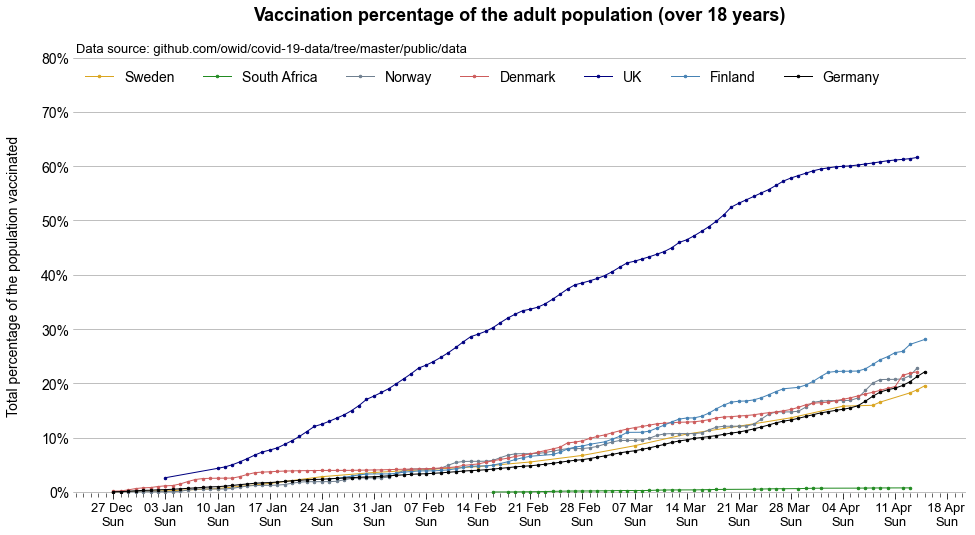

In [31]:
import matplotlib.ticker as mtick

fig, ax = plt.subplots(figsize=(16, 8))
ax.set_frame_on(False)

ax.plot(dat_sw.date.values, 100*dat_sw['people_vaccinated']/sw_pop_vac, marker='.', markersize=5, zorder=2, lw=1, label='Sweden',       c='goldenrod')
ax.plot(dat_sa.date.values, 100*dat_sa['people_vaccinated']/sa_pop_vac, marker='.', markersize=5, zorder=2, lw=1, label='South Africa', c='forestgreen')
ax.plot(dat_nw.date.values, 100*dat_nw['people_vaccinated']/nw_pop_vac, marker='.', markersize=5, zorder=2, lw=1, label='Norway',       c='slategrey')
ax.plot(dat_dn.date.values, 100*dat_dn['people_vaccinated']/dn_pop_vac, marker='.', markersize=5, zorder=2, lw=1, label='Denmark',      c='indianred')
ax.plot(dat_uk.date.values, 100*dat_uk['people_vaccinated']/uk_pop_vac, marker='.', markersize=5, zorder=2, lw=1, label='UK',           c='navy')
ax.plot(dat_fn.date.values, 100*dat_fn['people_vaccinated']/fn_pop_vac, marker='.', markersize=5, zorder=2, lw=1, label='Finland',      c='steelblue')
ax.plot(dat_gm.date.values, 100*dat_gm['people_vaccinated']/gm_pop_vac, marker='.', markersize=5, zorder=2, lw=1, label='Germany',      c='k')


# set label characteristics
ax.set_xlabel('')
ax.set_ylabel('Total percentage of the population vaccinated', labelpad=20)

ax.grid(lw=0.5, c='0.5', axis='y', zorder=0)

# format the ticks
month = mdates.MonthLocator()   # every week
weeks = mdates.WeekdayLocator(byweekday=SU)   # every week
weeks_fmt = mdates.DateFormatter('%d %b \n%a')

ax.xaxis.set_major_locator(weeks)
ax.xaxis.set_major_formatter(weeks_fmt)
ax.xaxis.set_minor_locator(days)

ax.set_frame_on(False)

xmin, xmax = ax.get_xaxis().get_view_interval()
ymin, ymax = ax.get_yaxis().get_view_interval()
ax.add_artist(Line2D((xmin, xmax), (ymin, ymin), color='0.5', linewidth=1.5))

plt.xticks(rotation=0)

ax.set_title('Vaccination percentage of the adult population (over 18 years)', fontsize=18, pad=20, fontweight='bold', y=1.04)

ax.text(pd.to_datetime('2020-12-22'), 81, 'Data source: github.com/owid/covid-19-data/tree/master/public/data', fontsize=13)

ax.legend(loc=2, ncol=7, frameon=False)

xmin, xmax = ax.get_xaxis().get_view_interval()
ymin, ymax = ax.get_yaxis().get_view_interval()
ax.add_artist(Line2D((xmin, xmax), (ymin, ymin), color='0.5', linewidth=1.5))

ax.yaxis.set_major_formatter(mtick.PercentFormatter())

ax.set_ylim(-0.1, 80)

savefig('../../vaccine_numbers_countries.png', dpi=300, bbox_inches='tight')

### Forecasts

Now I do some basic stats where I look at the rate of vaccinations over the last 3 weeks, and forecast this to predict when the date when 100% of the adult population will be vaccinated 

#### South Africa

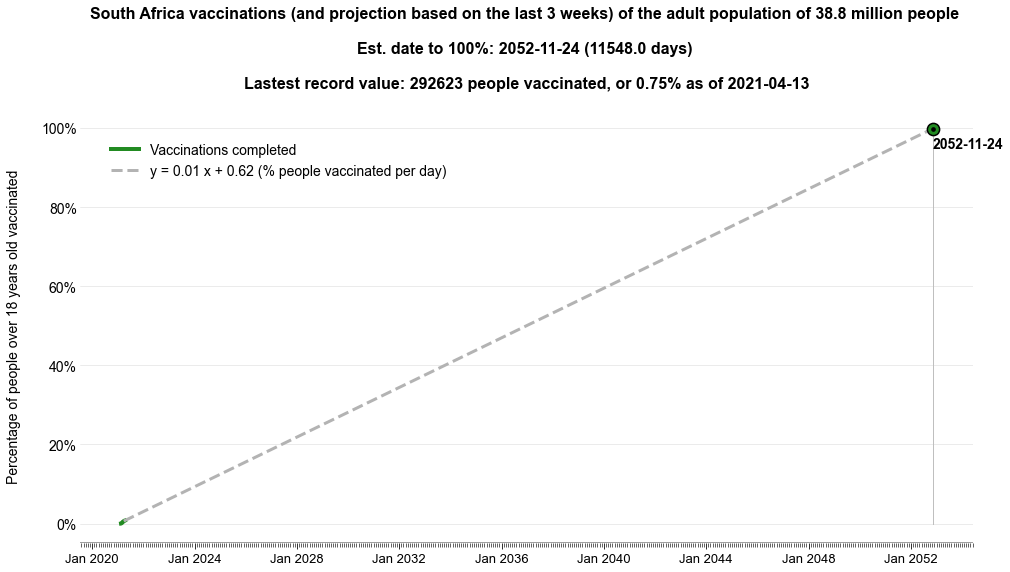

In [32]:
fig, ax = plt.subplots(figsize=(16, 8))
ax.set_frame_on(False)

# -------------- sweden --------------

x = date2num(dat_sa_1M.date.values)-date2num(dat_sa_1M.date.values)[0]
y = 100*dat_sa_1M['people_vaccinated']/sa_pop_vac

m, b = np.polyfit(x, y, 1)

ax.plot(dat_sa.date.values, 100*dat_sa['people_vaccinated']/sa_pop_vac, label='Vaccinations completed', marker='.', lw=4, markersize=0, c='forestgreen', zorder=2)

latest_value = (100*dat_sa['people_vaccinated']/sa_pop_vac)[-1].values
days_to_100  = np.round((100-latest_value)/m)
est_date_100 = dat_sa_1M.date[-1] + np.timedelta64(int(days_to_100),'D')

xnew = np.arange(0, days_to_100+latest_value, 1)

ax.plot(num2date(xnew+date2num(dat_sa_1M.date.values)[0]), m*xnew + b, label='y = '+str(np.round(m, 2))+' x + '+str(np.round(b, 2))+' (% people vaccinated per day)', lw=3, c='0.7', ls='--', alpha=1)

# plots

ax.set_ylabel('Percentage of people over 18 years old vaccinated', labelpad=20)

ax.grid(lw=0.5, c='0.85', axis='y', zorder=0)

# format the ticks
year = mdates.YearLocator()   # every week
month = mdates.MonthLocator()   # every week
# ax.xaxis.set_major_locator(year)
year_fmt = mdates.DateFormatter('%b %Y')
ax.xaxis.set_major_formatter(year_fmt)
ax.xaxis.set_minor_locator(month)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())

ax.legend(loc=2, ncol=1, bbox_to_anchor=(0.02,0.95), frameon=False)

last_rec = (100*dat_sa['people_vaccinated']/sa_pop_vac)[-1]

ax.set_title('South Africa vaccinations (and projection based on the last 3 weeks) of the adult population of ' + str(np.round(sa_pop_vac/1e6, 1)) + ' million people \n '
             ' \n'
             'Est. date to 100%: '+str(est_date_100.values)[:10] + ' (' + str(days_to_100) + ' days) \n' 
             ' \n'
             'Lastest record value: '+str(dat_sa['people_vaccinated'][-1].values)+' people vaccinated, or '+str(np.round(last_rec.values, 2))+'% as of '+str(last_rec.date.values)[:10]
             , fontsize=16, fontweight='bold', pad=20)

xmin, xmax = ax.get_xaxis().get_view_interval()
ymin, ymax = ax.get_yaxis().get_view_interval()
ax.add_artist(Line2D((xmin, xmax), (ymin, ymin), color='0.5', linewidth=1.5))

# ax.set_ylim(-0.3, 105)

est_date = num2date(xnew+date2num(dat_sa_1M.date.values)[0])[-1]

ax.scatter(est_date, (m*xnew + b)[-1], s=150, c='forestgreen', lw=1.5, edgecolor='k', zorder=10)
ax.scatter(est_date, (m*xnew + b)[-1], s=10, c='k', lw=1.5, edgecolor='k', zorder=10)
ax.text(est_date, 95, str(est_date_100.values)[:10], fontweight='bold')

ax.plot([est_date, est_date], [0, 100], lw=1, c='0.75')

savefig('../../vaccine_southafrica_projection.png', dpi=300, bbox_inches='tight')

#### Sweden

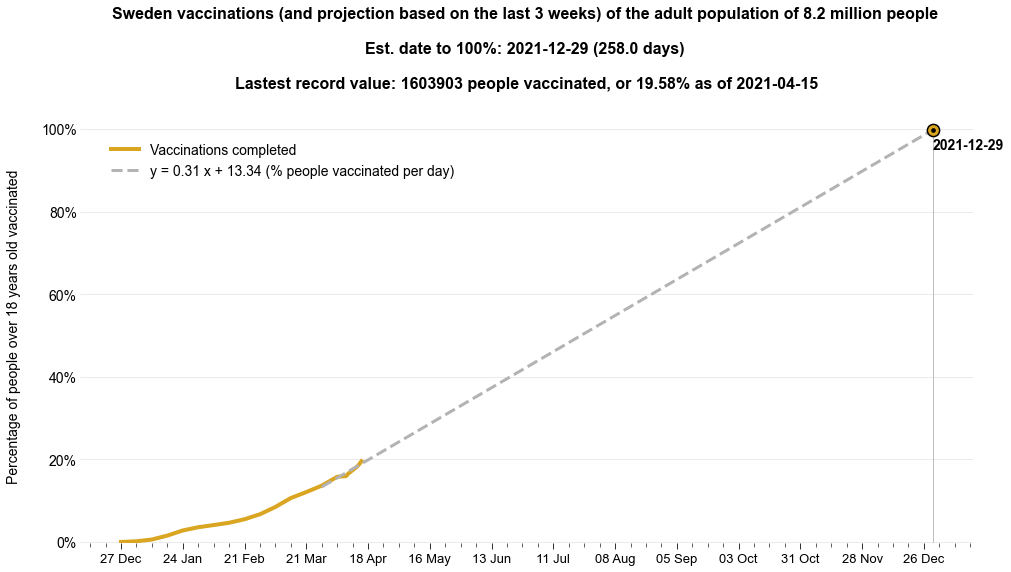

In [33]:
fig, ax = plt.subplots(figsize=(16, 8))
ax.set_frame_on(False)

# -------------- sweden --------------

x = date2num(dat_sw_1M.date.values)-date2num(dat_sw_1M.date.values)[0]
y = 100*dat_sw_1M['people_vaccinated']/sw_pop_vac

m, b = np.polyfit(x, y, 1)

ax.plot(dat_sw.date.values, 100*dat_sw['people_vaccinated']/sw_pop_vac, label='Vaccinations completed', marker='.', lw=4, markersize=0, c='goldenrod', zorder=2)

latest_value = (100*dat_sw['people_vaccinated']/sw_pop_vac)[-1].values
days_to_100  = np.round((100-latest_value)/m)
est_date_100 = dat_sw_1M.date[-1] + np.timedelta64(int(days_to_100),'D')

xnew = np.arange(0, days_to_100+latest_value, 1)

ax.plot(num2date(xnew+date2num(dat_sw_1M.date.values)[0]), m*xnew + b, label='y = '+str(np.round(m, 2))+' x + '+str(np.round(b, 2))+' (% people vaccinated per day)', lw=3, c='0.7', ls='--', alpha=1)

# plots

ax.set_ylabel('Percentage of people over 18 years old vaccinated', labelpad=20)

ax.grid(lw=0.5, c='0.85', axis='y', zorder=0)

# format the ticks
month = mdates.MonthLocator()   # every week
week  = mdates.WeekdayLocator(byweekday=SU, interval=1)   # every week
weeks = mdates.WeekdayLocator(byweekday=SU, interval=4)   # every week
ax.xaxis.set_major_locator(weeks)
weeks_fmt = mdates.DateFormatter('%d %b')
ax.xaxis.set_major_formatter(weeks_fmt)
ax.xaxis.set_minor_locator(week)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())

ax.legend(loc=2, ncol=1, bbox_to_anchor=(0.02,0.95), frameon=False)

last_rec = (100*dat_sw['people_vaccinated']/sw_pop_vac)[-1]

ax.set_title('Sweden vaccinations (and projection based on the last 3 weeks) of the adult population of ' + str(np.round(sw_pop_vac/1e6, 1)) + ' million people \n '
             ' \n'
             'Est. date to 100%: '+str(est_date_100.values)[:10] + ' (' + str(days_to_100) + ' days) \n' 
             ' \n'
             'Lastest record value: '+str(dat_sw['people_vaccinated'][-1].values)+' people vaccinated, or '+str(np.round(last_rec.values, 2))+'% as of '+str(last_rec.date.values)[:10]
             , fontsize=16, fontweight='bold', pad=20)

xmin, xmax = ax.get_xaxis().get_view_interval()
ymin, ymax = ax.get_yaxis().get_view_interval()
ax.add_artist(Line2D((xmin, xmax), (ymin, ymin), color='0.5', linewidth=1.5))

ax.set_ylim(-0.3, 105)

est_date = num2date(xnew+date2num(dat_sw_1M.date.values)[0])[-1]

ax.scatter(est_date, (m*xnew + b)[-1], s=150, c='goldenrod', lw=1.5, edgecolor='k', zorder=10)
ax.scatter(est_date, (m*xnew + b)[-1], s=10, c='k', lw=1.5, edgecolor='k', zorder=10)
ax.text(est_date, 95, str(est_date_100.values)[:10], fontweight='bold')

ax.plot([est_date, est_date], [0, 100], lw=1, c='0.75')

savefig('../../vaccine_sweden_projection.png', dpi=300, bbox_inches='tight')